# Housing Price Prediction – Modeling
This notebook builds regression models using the preprocessed housing dataset to predict log-transformed housing prices. 
It follows the modeling portion of the project, focusing on applying multiple algorithms and tuning them.

In [19]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
# Load Preprocessed Data
df = pd.read_csv('processed_housing.csv')
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sale_year,sale_month,was_renovated,effective_year,effective_age,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log
0,2,1.00,1.0,0,0,3,7,98178,2014,10,0,1955,59,12.351475,7.074117,8.639588,7.201171,8.639588
1,3,2.25,2.0,0,0,3,7,98125,2014,12,1,1991,23,13.195616,7.852050,8.887791,7.433075,8.941153
2,2,1.00,1.0,0,0,3,6,98028,2015,2,0,1933,82,12.100718,6.647688,9.210440,7.908755,8.995041
3,4,3.00,1.0,0,0,5,7,98136,2014,12,0,1965,49,13.311331,7.581210,8.517393,7.215975,8.517393
4,3,2.00,1.0,0,0,3,8,98074,2015,2,0,1987,28,13.142168,7.427144,8.997271,7.496097,8.923191


In [21]:
# Define Target and Features
X = df.drop('price_log', axis=1)
y = df['price_log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Preprocessing Setup
scale_features = [
    'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade',
    'sale_year', 'sale_month', 'effective_year', 'effective_age',
    'sqft_living_log', 'sqft_lot_log', 'sqft_living15_log', 'sqft_lot15_log'
]

# Binary features 
binary_features = ['waterfront', 'was_renovated']

# Drop zipcode
categorical_features = []  

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), scale_features),
        ('bin', 'passthrough', binary_features)
    ]
)

In [24]:
# Gradient Boosting Regressor - Khushi

from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print(f"MAE: {mae_gb:.3f}")
print(f"RMSE: {rmse_gb:.3f}")
print(f"R²: {r2_gb:.3f}")

Gradient Boosting Results:
MAE: 0.232
RMSE: 0.292
R²: 0.701


In [25]:
# Linear Regression Part- Sangit

from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: {mae_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R²: {r2_lr:.3f}")

Linear Regression Results:
MAE: 0.247
RMSE: 0.311
R²: 0.662


/Users/khushinanda/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/khushinanda/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/khushinanda/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [26]:
# Decision Tree model - Rose
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps = [('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state = 42))])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"MAE: {mae_dt:.3f}")
print(f"RMSE: {rmse_dt:.3f}")
print(f"R²: {r2_dt:.3f}")

Decision Tree Results:
MAE: 0.297
RMSE: 0.392
R²: 0.462


In [27]:
results_df = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Linear Regression', 'Decision Tree'],
    'MAE': [mae_gb, mae_lr, mae_dt],
    'RMSE': [rmse_gb, rmse_lr, rmse_dt],
    'R²': [r2_gb, r2_lr, r2_dt]
})

results_df

,Model,MAE,RMSE,R²
0,Gradient Boosting,0.232281,0.292356,0.701029
1,Linear Regression,0.246765,0.311061,0.661549
2,Decision Tree,0.296812,0.392301,0.461678


In [28]:
# Hyperparameter Tuning (Gradient Boosting)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated R²:", grid.best_score_)


Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__subsample': 0.8}
Best Cross-Validated R²: 0.7252224310833724


In [29]:
# Retrain Best Gradient Boosting Model with Tuned Parameters

best_gb = grid.best_estimator_
best_gb.fit(X_train, y_train)

# Evaluate on test data
y_pred_best = best_gb.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Performance of Tuned Gradient Boosting Model:")
print(f"MAE: {mae_best:.3f}")
print(f"RMSE: {rmse_best:.3f}")
print(f"R²: {r2_best:.3f}")

Performance of Tuned Gradient Boosting Model:
MAE: 0.218
RMSE: 0.280
R²: 0.726


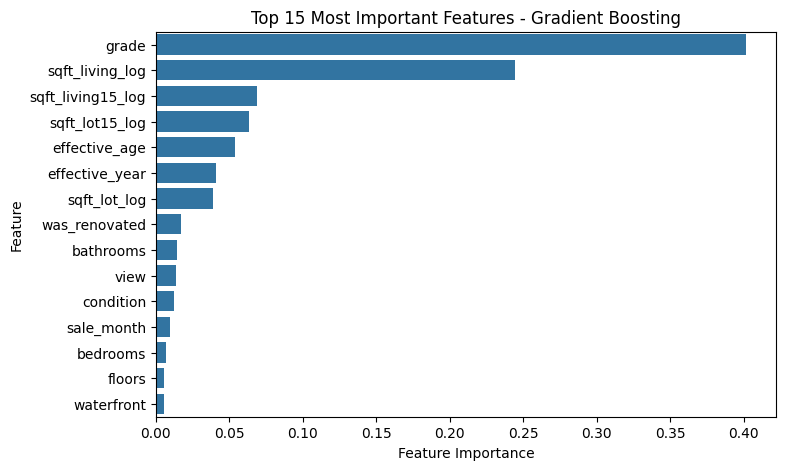

In [30]:
# Feature Importance (for Tuned Gradient Boosting)

best_gb_model = best_gb.named_steps['model']
best_gb_model.fit(preprocessor.fit_transform(X_train), y_train)

importances = best_gb_model.feature_importances_

# Combine scaled + binary feature names
feature_names = scale_features + binary_features

# Create feature importance DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False).head(15)

# Plot top features
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Top 15 Most Important Features - Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Modeling Summary

We trained and compared three machine learning models — **Linear Regression**, **Decision Tree**, and **Gradient Boosting** — to predict log-transformed housing prices using the processed dataset.

## Model Results
| Model | MAE | RMSE | R² |
|--------|------|------|------|
| Linear Regression | 0.247 | 0.311 | 0.662 |
| Decision Tree | 0.297 | 0.392 | 0.462 |
| Gradient Boosting (Before Tuning) | 0.232 | 0.292 | 0.701 |
| **Tuned Gradient Boosting (Final Model)** | **0.218** | **0.280** | **0.726** |

## Discussion
- **Linear Regression** performed as a simple baseline but struggled to capture the nonlinear nature of housing prices, resulting in moderate predictive power (R² = 0.662).  
- **Decision Tree** provided interpretability but showed lower generalization due to overfitting and limited complexity (R² = 0.462).  
- **Gradient Boosting** improved accuracy substantially, learning nonlinear feature interactions and achieving stronger results (R² = 0.701).  
- After **hyperparameter tuning**, the **Tuned Gradient Boosting Model** achieved the **best overall performance (R² = 0.726)**, with reduced error values (MAE = 0.218, RMSE = 0.280).  

These results confirm that ensemble methods like Gradient Boosting outperform simpler models when relationships between variables are complex and nonlinear.

The Gradient Boosting model identified **grade**, **sqft_living_log**, and **sqft_lot15_log** as the top predictors of housing prices.

- **Grade** was the most dominant factor, showing that higher construction quality and design have the strongest impact on price.  
- **sqft_living_log** (interior living area) was the next key predictor, emphasizing that larger living spaces command higher prices.  
- **sqft_living15_log** and **sqft_lot15_log** also contributed significantly, indicating that neighborhood size and nearby property characteristics influence value.  
- **Effective_age** and **effective_year** were moderately important, highlighting that newer or recently renovated homes tend to have higher prices.  
- Other important variables included **was_renovated**, **view**, and **condition**, which further reflect property quality and desirability.

### Conclusion
The **Tuned Gradient Boosting model** is selected as the final model for evaluation and potential deployment, providing the best balance between accuracy and interpretability for predicting housing prices.
